# AUDIO SIGNAL PROCESSING




##### This python project focus on removing high frequency disturbances from the audio using librosa package and leveraging various other concepts of audio processing .
 

In [2]:
import librosa
import librosa.display

C:\Users\dev05\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
import numpy as np
import pandas as pd
import wave

C:\Users\dev05\AppData\Local\Temp\ipykernel_21012\3991229741.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
audio_file=r'Media\s3.wav'
ipd.Audio(audio_file)

In [6]:
D=wave.open(audio_file,"rb")
print("number of chhanels",D.getnchannels())
print("sample width in bytes",D.getsampwidth())
print("frame rate ",D.getframerate())
print("number of frames",D.getnframes())
print("time duration ",D.getnframes()/D.getframerate())

number of chhanels 2
sample width in bytes 2
frame rate  44100
number of frames 71571
time duration  1.6229251700680272


In [7]:
y,Sr=librosa.load(audio_file,sr=44100)
y.shape
n=71571

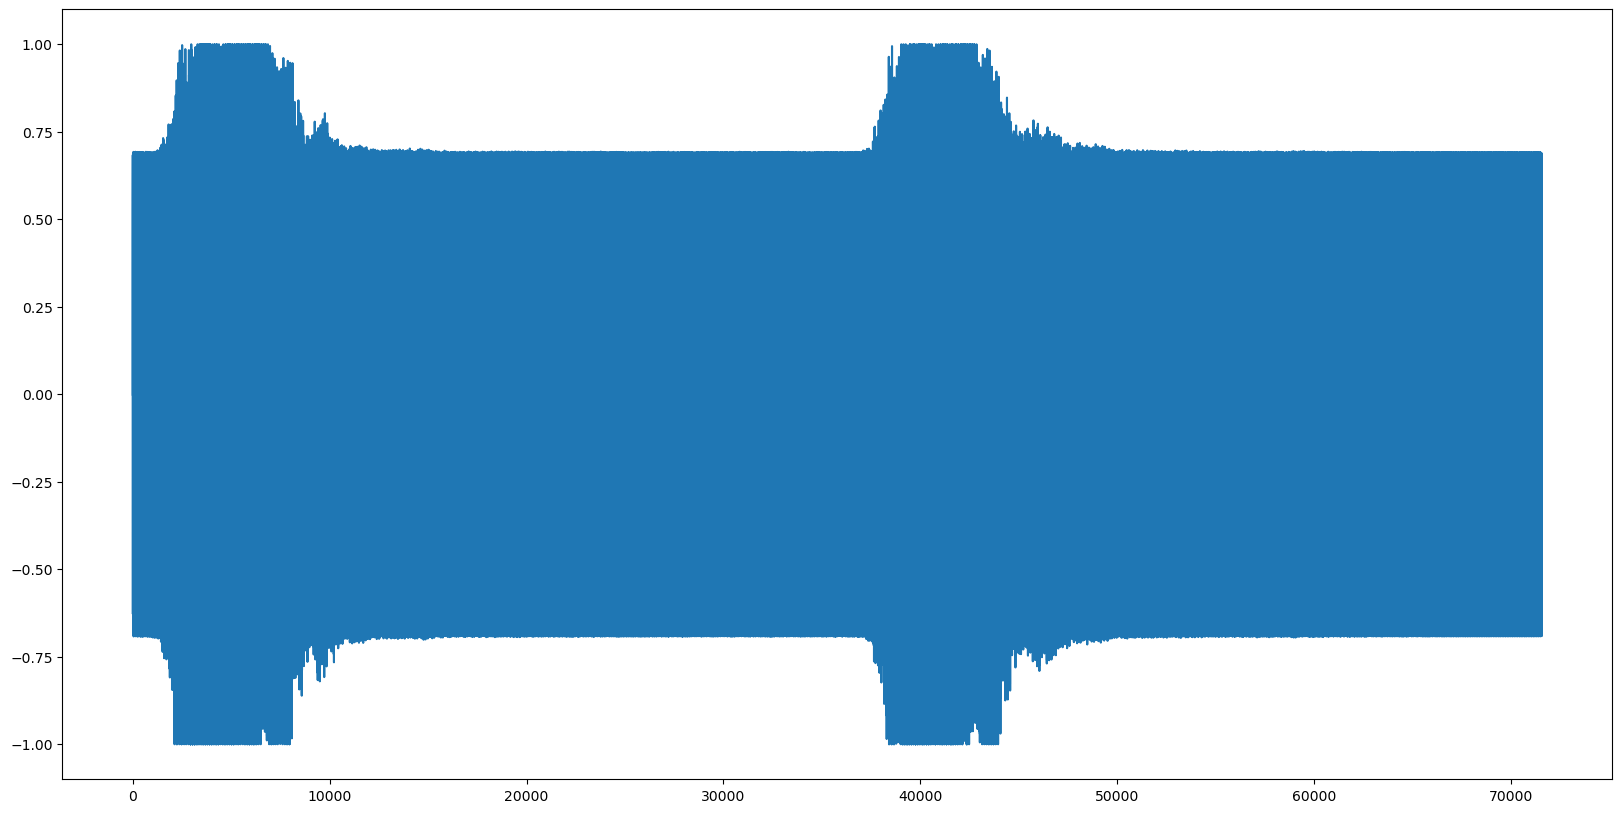

In [8]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.show()

SAMPLE NUMBER VS AMPLITUDE 

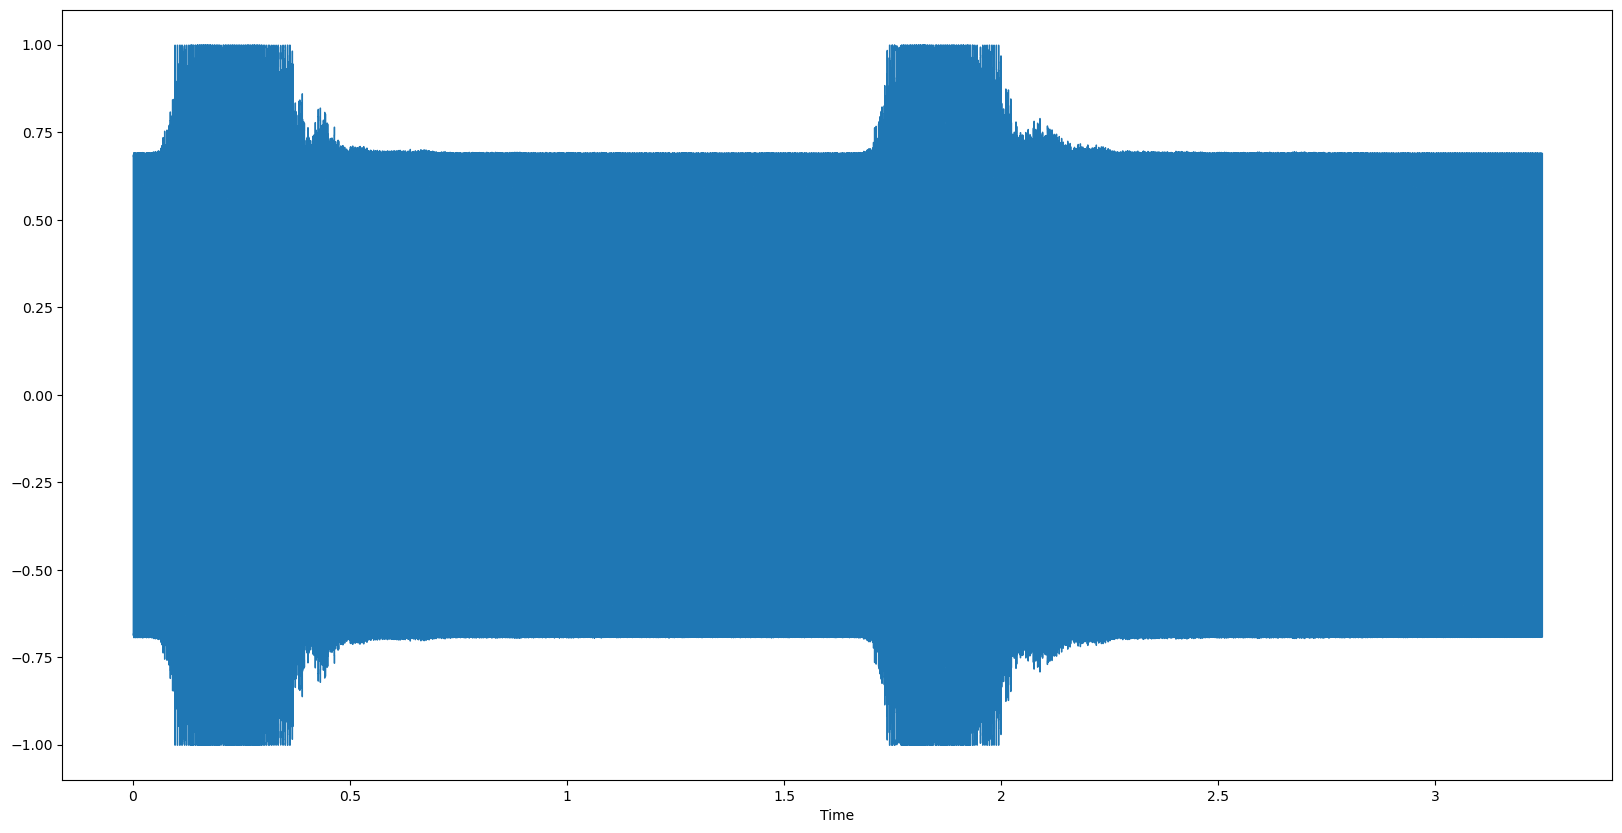

In [9]:
plt.figure(figsize=(20,10))
librosa.display.waveshow(y)
plt.show()

TIME VS AMPLITUDE

In [10]:
d=librosa.stft(y,n_fft=80)
ff=librosa.amplitude_to_db(np.abs(d)**2,ref=np.max)

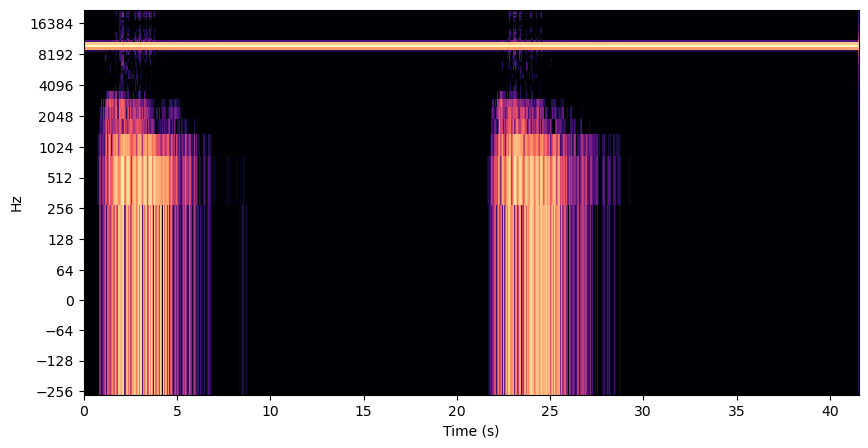

In [11]:
fig,ax=plt.subplots(figsize=(10,5))
librosa.display.specshow(ff,sr=Sr,x_axis='s',y_axis='log',ax=ax)
plt.show()

SPECTOGRAM--------TIME VS FREQUENCY

In [12]:
ff=np.fft.fft(y)
Pval=2*np.abs(ff/n)
freq=np.arange(n)
L=np.arange(0,np.floor(n/2),dtype='int')

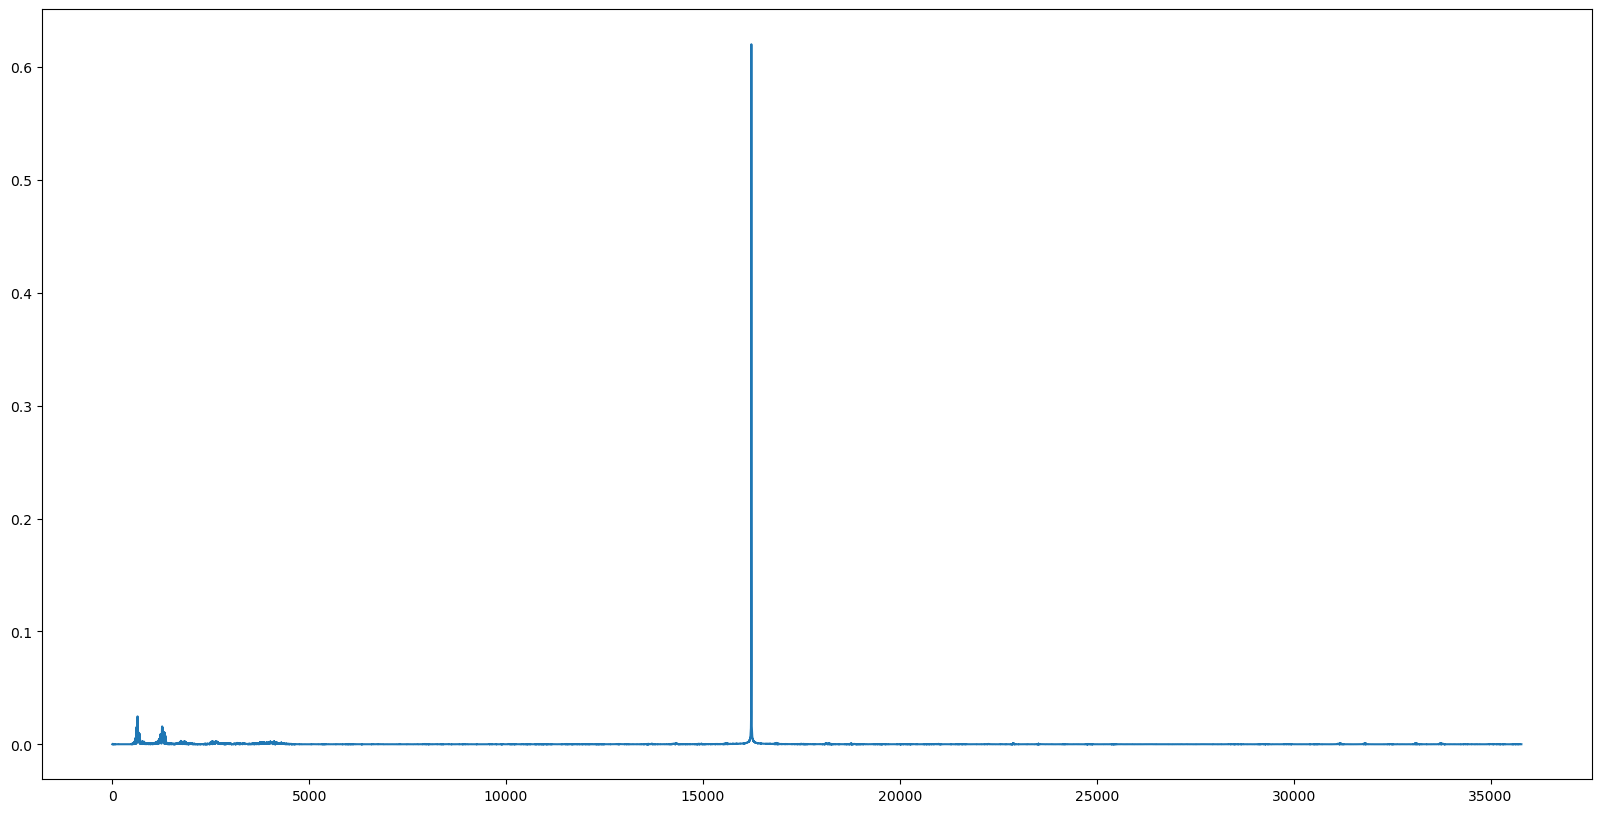

In [13]:
plt.figure(figsize=(20,10))
plt.plot(freq[L],Pval[L])
plt.show()

In [14]:
findices=freq<10000
Pvalf=Pval*findices
fff=findices*ff
ffilt=np.fft.ifft(fff)

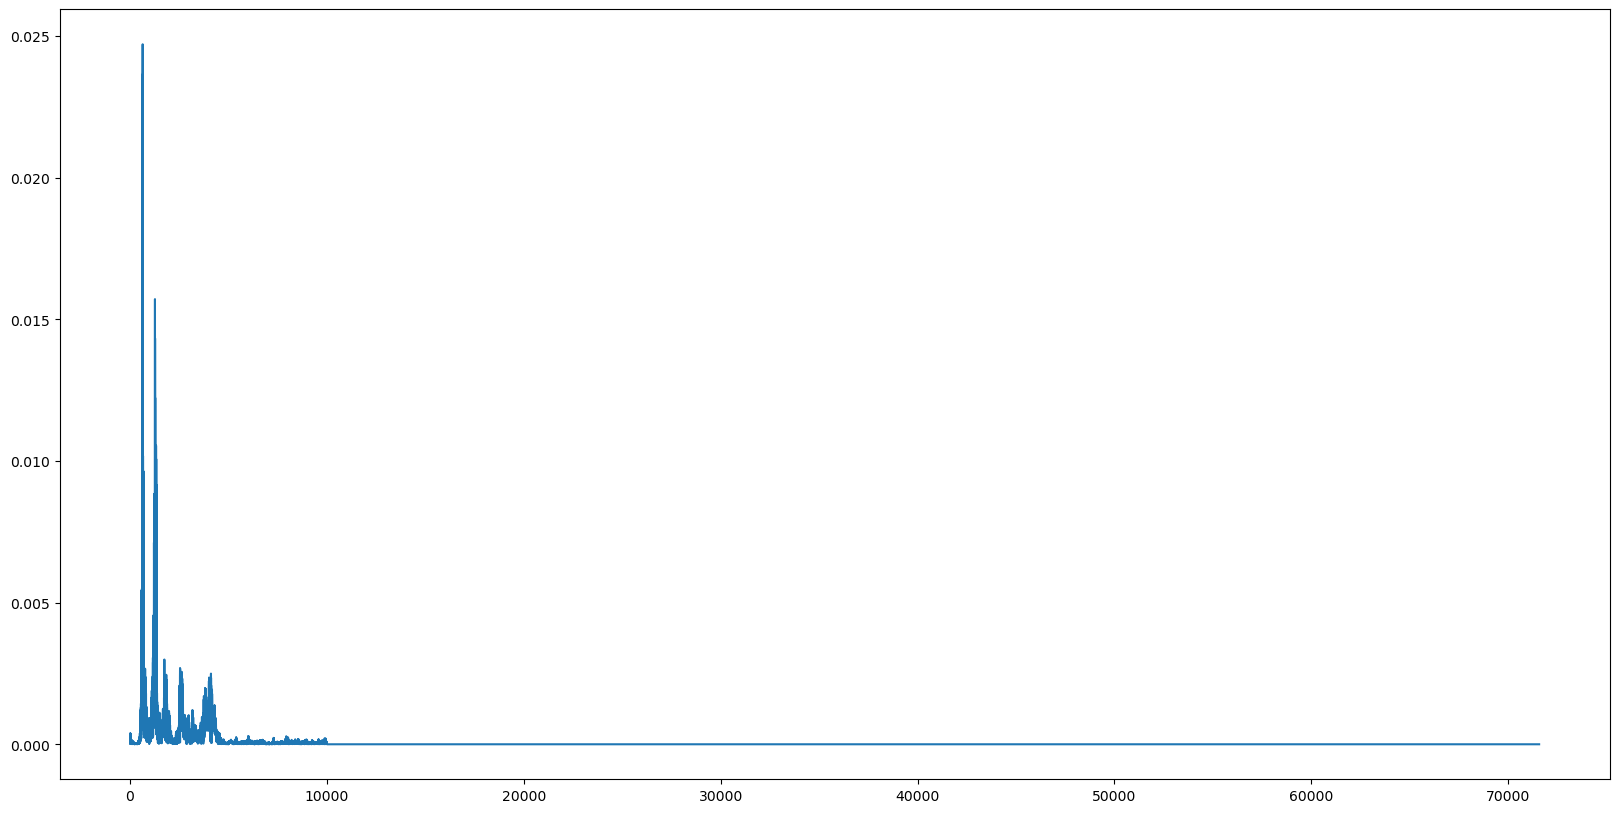

In [15]:
plt.figure(figsize=(20,10))
plt.plot(freq[0:100000],Pvalf[0:100000])
plt.show()

In [16]:
ipd.Audio(ffilt,rate=44100)

C:\Users\dev05\anaconda3\lib\site-packages\IPython\lib\display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [17]:
indices=Pval>0.0003
Pvala=Pvalf*indices
ffff=indices*fff
ffilt=np.fft.ifft(ffff)

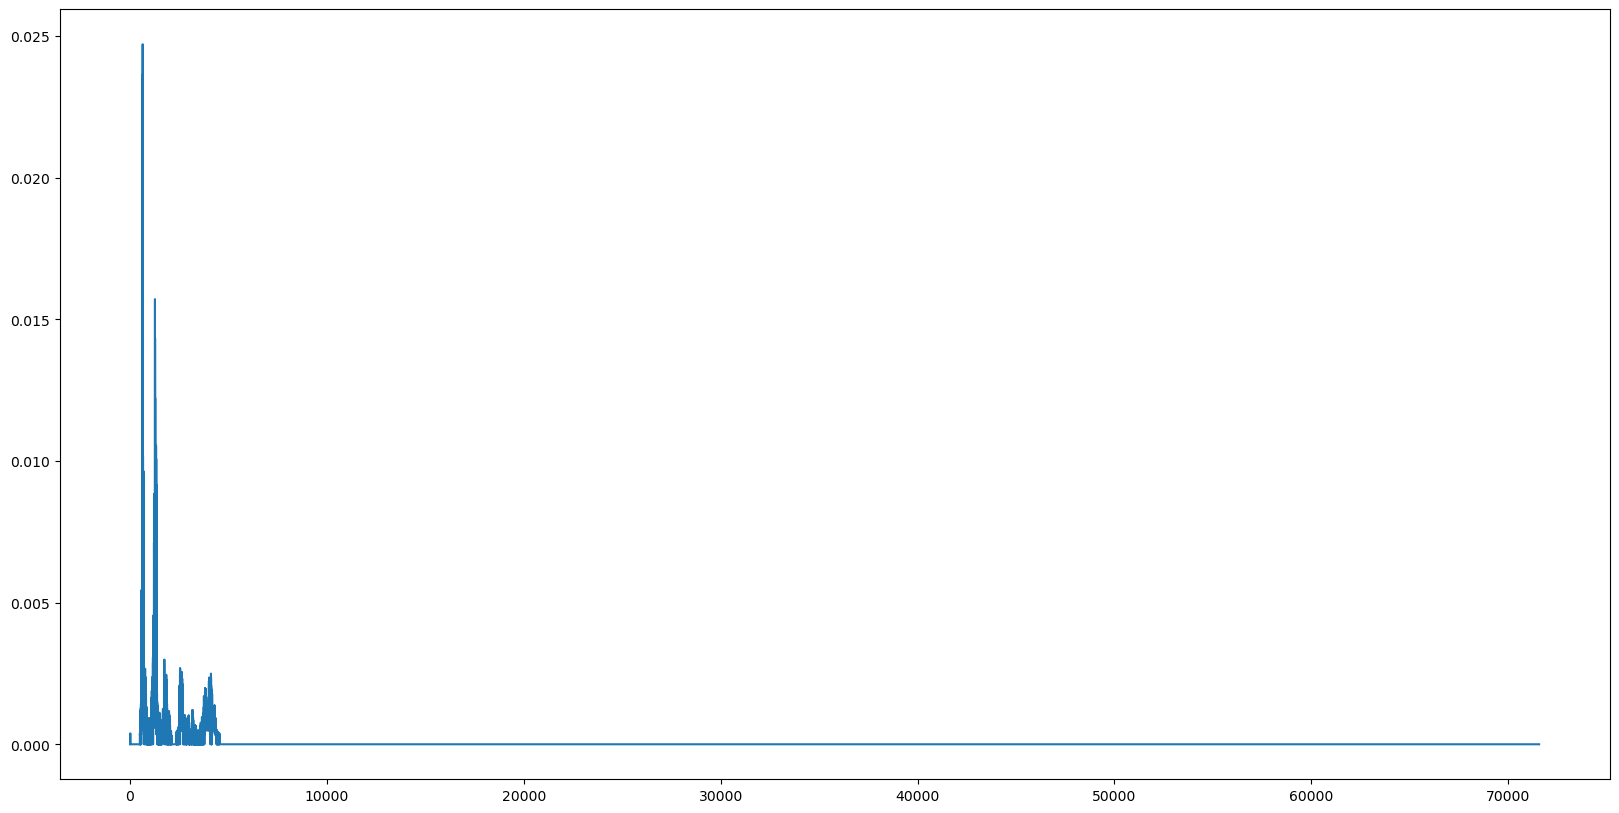

In [18]:
plt.figure(figsize=(20,10))
plt.plot(freq[0:100000],Pvala[0:100000])
plt.show()

In [19]:
amp=np.abs(ffilt)>0.01
ffilt=ffilt*amp
ffiltp=np.abs(ffilt*np.conj(ffilt))

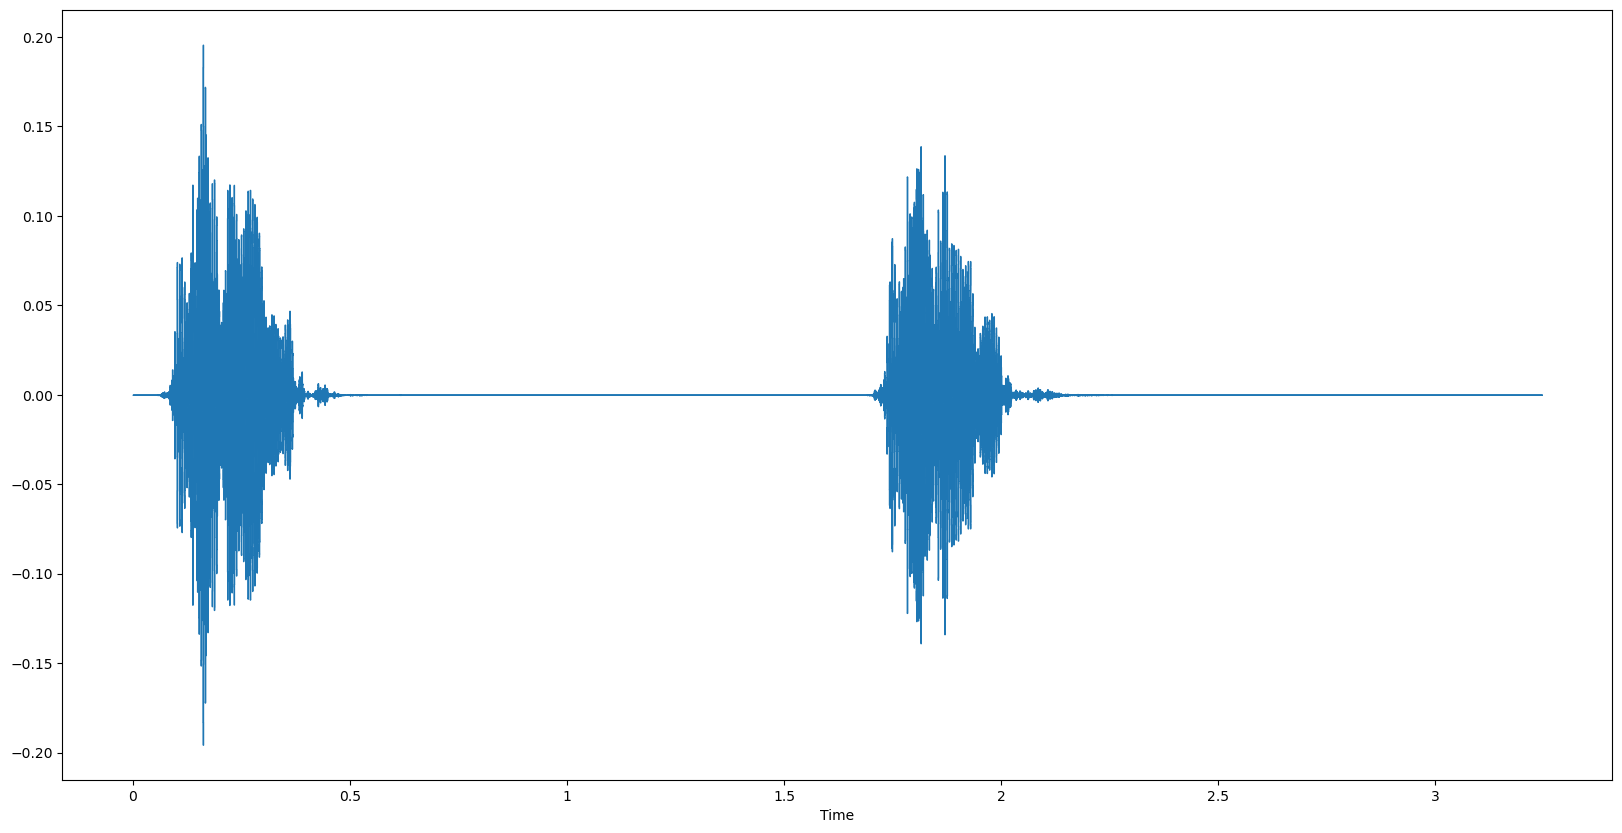

In [20]:
plt.figure(figsize=(20,10))
librosa.display.waveshow(ffiltp)
plt.show()

THANKYOU